### Задание 0. 

Посчитайте 2 шага градиентного спуска для примера, который мы разбирали на занятии, с учетом свободного коэффициента (то есть, надо посчитать не только градиенты по $w_1$, но и по $w_0$.

Будем считать, что наша выборка состоит из следующих объектов:

 № | x | $y_{true}$ |
| --- | --- | --- |
| 1 | 3 | 7 |
| 2 | 5 | 11 |

Веса инициализируем как $w_1 = 1$ и $w_0 = 0$. Возьмем $\eta = 0.01$.

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Задание 1. 

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию. 

In [87]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [89]:
data.drop(['Product_id'], axis=1, inplace=True)

<Axes: >

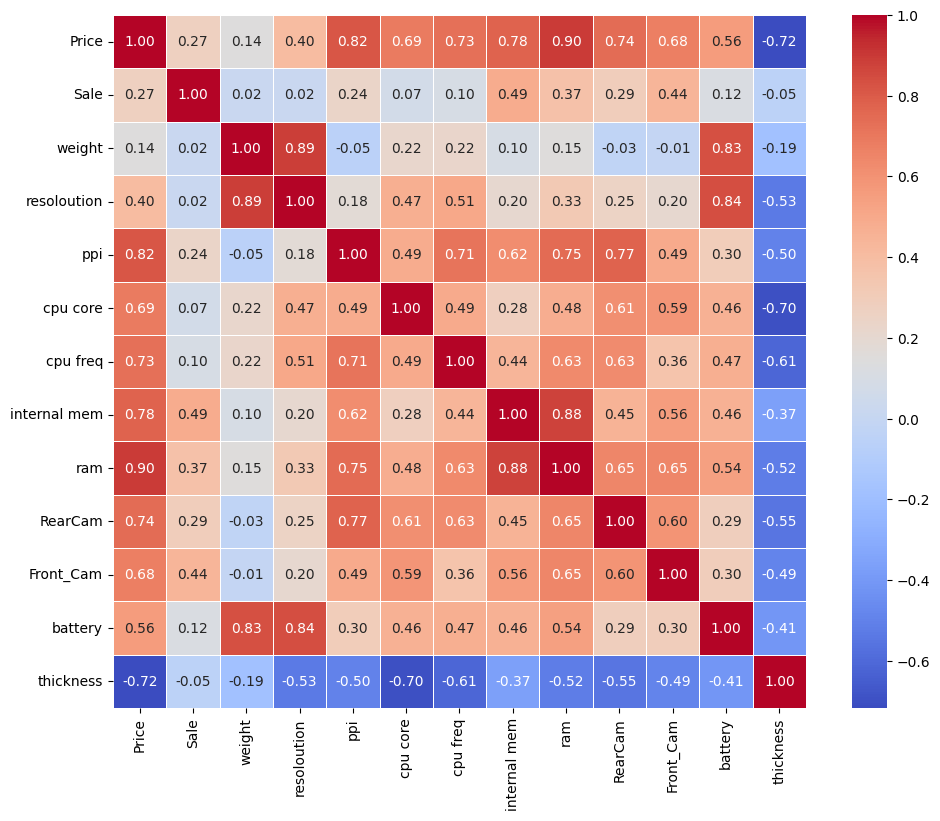

In [90]:
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',
            cmap='coolwarm', square=True)

In [91]:
def prepare_data(data, target_column='Price', test_size=0.2, random_state=42):
    X = data.drop([target_column], axis=1)
    y = data[target_column]

    # Масштабируем данные
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Разделяем данные
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_evaluate(data, target_column='Price', test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = prepare_data(data, target_column, test_size, random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
    rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return rmse_train, rmse_test, r2_train, r2_test

In [92]:
train_evaluate(data)

(169.15427040677258, 147.9205587556227, 0.9516006085915757, 0.9614025134850829)

У признака 'weight' низкая корреляция с целевой переменной 'Price'.  
Кроме того, 'weight' сильно коррелирует с 'resoloution' и 'battery'.  
Попробуем удалить признак 'weight' из данных.

In [93]:
data.drop(['weight'], axis=1, inplace=True)
train_evaluate(data)

(169.48175218643246,
 147.05895958776586,
 0.9514130252515327,
 0.9618508448055949)

В целом, удаление признака 'weight' привело к незначительному улучшению обобщающей способности модели без существенной потери точности на обучающих данных.

In [94]:
X_train, X_test, y_train, y_test = prepare_data(data)

In [97]:
# Добавим L1 регуляризацию и подберем оптимальное значение alpha
lasso_alphas = np.logspace(-4, 2, 200)
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

optimal_alpha_lasso = lasso_cv.alpha_

# Обучение модели Lasso с оптимальным alpha
lasso_regressor = Lasso(alpha=optimal_alpha_lasso)
lasso_regressor.fit(X_train, y_train)

ypred_train_lasso = lasso_regressor.predict(X_train)
ypred_test_lasso = lasso_regressor.predict(X_test)

rmse_train_lasso = mean_squared_error(y_train, ypred_train_lasso) ** 0.5
rmse_test_lasso = mean_squared_error(y_test, ypred_test_lasso) ** 0.5
r2_train_lasso = r2_score(y_train, ypred_train_lasso)
r2_test_lasso = r2_score(y_test, ypred_test_lasso)

optimal_alpha_lasso, rmse_train_lasso, rmse_test_lasso, r2_train_lasso, r2_test_lasso

(0.0001,
 169.48175218724134,
 147.05908004933275,
 0.9514130252510689,
 0.9618507823067317)

In [99]:
# Добавим L2 регуляризацию и подберем оптимальное значение alpha
ridge_alphas = np.logspace(-4, 2, 200)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=3, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

optimal_alpha_ridge = ridge_cv.alpha_

# Обучение модели Ridge с оптимальным alpha
ridge_regressor = Ridge(alpha=optimal_alpha_ridge)
ridge_regressor.fit(X_train, y_train)

ypred_train_ridge = ridge_regressor.predict(X_train)
ypred_test_ridge = ridge_regressor.predict(X_test)

rmse_train_ridge = mean_squared_error(y_train, ypred_train_ridge) ** 0.5
rmse_test_ridge = mean_squared_error(y_test, ypred_test_ridge) ** 0.5
r2_train_ridge = r2_score(y_train, ypred_train_ridge)
r2_test_ridge = r2_score(y_test, ypred_test_ridge)

optimal_alpha_ridge, rmse_train_ridge, rmse_test_ridge, r2_train_ridge, r2_test_ridge

(3.5707859649004625,
 170.21058031425827,
 151.15695037289248,
 0.9509942463076297,
 0.9596950683031925)

Lasso регуляризация оказала минимальное влияние на результаты.  
Регуляризация Ridge привела к небольшому ухудшению показателей. 

# Задание 2. 

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change. 

In [106]:
data = pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         150 non-null    object 
 1   Stone        142 non-null    float64
 2   Pounds       142 non-null    float64
 3   Ounces       142 non-null    float64
 4   weight_oz    149 non-null    float64
 5   calories     140 non-null    float64
 6   cals_per_oz  147 non-null    object 
 7   five_donuts  140 non-null    float64
 8   walk         140 non-null    float64
 9   run          140 non-null    float64
 10  wine         140 non-null    float64
 11  prot         140 non-null    float64
 12  weight       140 non-null    float64
 13  change       147 non-null    float64
dtypes: float64(12), object(2)
memory usage: 16.6+ KB


In [108]:
data.isnull().sum()

Date            1
Stone           9
Pounds          9
Ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          4
dtype: int64

In [109]:
data.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,142.000000,142.000000,142.000000,149.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,147.000000
mean,11.535211,6.218310,3.577465,2560.724832,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-19.088435
std,0.500524,5.655746,2.915656,571.190848,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,215.557796
min,11.000000,0.000000,0.000000,0.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2598.000000
25%,11.000000,1.000000,0.000000,2662.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.500000,4.000000,2688.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,14.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


Stone, Pounds, Ounces используются для расчёта weight_oz. Имеет смысл оставить только weight_oz.  
Похоже, в change есть выбросы. 

In [110]:
data.drop(['Stone', 'Pounds', 'Ounces', 'Date'], axis=1, inplace=True)

In [112]:
# Удаление строки с выбросом в 'change' 
data = data[data['change'] != data['change'].min()]

data['cals_per_oz'] = pd.to_numeric(data['cals_per_oz'], errors='coerce')

numeric_cols = ['weight_oz', 'calories', 'cals_per_oz', 'change']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

binary_cols = ['five_donuts', 'walk', 'run', 'wine', 'prot', 'weight']
data[binary_cols] = data[binary_cols].fillna(0)

data.isnull().sum()

weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [114]:
X = data.drop('change', axis=1)
y = data['change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train, rmse_test, r2_train, r2_test

(12.279851612327558,
 13.634477094884826,
 0.7376773497974496,
 0.6499341562764783)

К сожалению, я не успел доделать задание...

# Задание 3. 

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно. 

In [4]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# your code here